In [24]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

Wczytanie danych

In [25]:
directory = "../Original Data/weather.txt"

with open(directory) as file:
    original_data = file.readlines()


Przygotowanie danych do zapisu w DataFrame

In [ ]:

regex = re.compile('\s+I|\s+SI|S|OI|OS')

out_data = []

for line in original_data:
    line = line.replace("MAX", "MAX ")
    line = line.replace("MIN", "MIN ")
    line = line.replace("PRCP", "PRCP ")
    line = regex.sub(' ', line)

    out_data.append(["MX17004"] + [line[11:15]] + [line[15:17]] + [line[17:21]] + line[22:].split())

"Czyszczenie" danych z niepoprawnych wartości

In [26]:
cleared_data = []

for row in out_data:
    if int(row[1]) <= 1980:
        cleared_data.append(row)

Stworzenie DataFrame

In [162]:
df = pd.DataFrame(cleared_data)
df.columns = ["Weather station ID", "Year", "Month", "Type"] + list(np.linspace(1, 31, 31, dtype=int))

# Zamiana błędnych wartości "-9999" na "None"
df.replace('-9999', 'None', inplace=True)

# Konwersja temperatury
indx_TMAX = df.index[df['Type'] == "TMAX"].tolist()
indx_TMIN = df.index[df['Type'] == "TMIN"].tolist()
indx_PRCP = df.index[df['Type'] == "PRCP"].tolist()

no_rows = df.shape[0]

for i in range(0, no_rows):
    for j in range(1, 32):
        if df.loc[i, j] != "None":
            if i in indx_TMAX or i in indx_TMIN:
                df.loc[i, j] = int(df.loc[i, j]) / 10
            else:
                df.loc[i, j] = int(df.loc[i, j])
df

,Weather station ID,Year,Month,Type,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,MX17004,1955,04,TMAX,31.0,31.0,31.0,32.0,33.0,32.0,...,33.0,33.0,33.0,33.0,33.0,33.0,34.0,33.0,32.0,None
1,MX17004,1955,04,TMIN,15.0,15.0,16.0,15.0,16.0,16.0,...,17.0,17.0,17.0,18.0,19.0,19.0,17.0,18.0,16.0,None
2,MX17004,1955,04,PRCP,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,None
3,MX17004,1955,05,TMAX,31.0,31.0,31.0,30.0,30.0,30.0,...,33.0,34.0,35.0,33.0,31.0,31.0,32.0,31.0,30.0,29.0
4,MX17004,1955,05,TMIN,20.0,16.0,16.0,15.0,15.0,15.0,...,17.0,19.0,19.0,19.0,18.0,16.0,15.0,17.0,15.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,MX17004,1980,11,TMIN,13.0,15.0,15.0,15.0,15.0,14.0,...,17.0,16.0,15.0,15.0,14.0,14.0,13.0,14.0,14.0,None
875,MX17004,1980,11,PRCP,0,0,0,33,103,0,...,0,0,0,0,0,0,0,0,0,None
876,MX17004,1980,12,TMAX,25.5,26.0,26.0,26.0,26.0,27.0,...,22.0,23.5,24.5,25.5,22.5,20.5,25.0,25.5,23.0,23.0
877,MX17004,1980,12,TMIN,14.0,15.0,14.0,12.0,14.0,15.5,...,10.0,13.0,14.0,14.0,12.5,14.5,12.0,13.0,11.0,9.0


Zapis tabeli do pliku .csv

In [168]:
df.to_csv("../Analysis Data/weather.csv")

Wykresy finalnych danych oraz zapis ich do .png

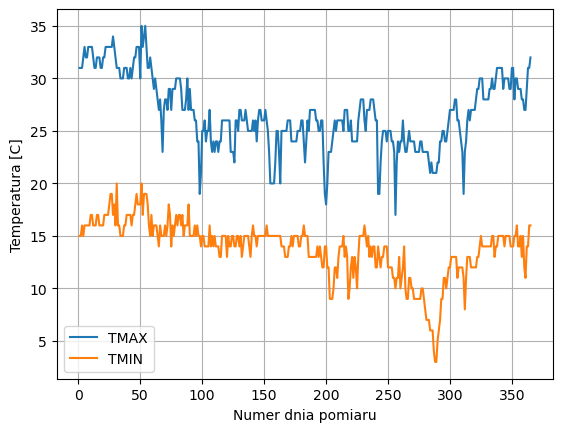

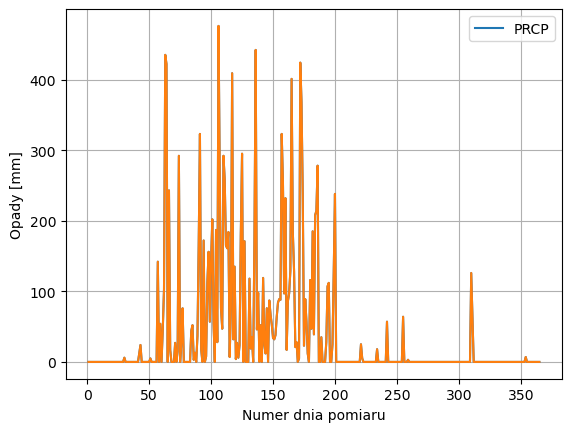

In [167]:
TMAX = []
TMIN = []
PRCP = []

for i in range(0, no_rows):
    for j in range(1, 32):
        if df.loc[i, j] != "None":
            if i in indx_TMAX:
                TMAX.append(df.loc[i, j])
            elif i in indx_TMIN:
                TMIN.append(df.loc[i, j])
            elif i in indx_PRCP:
                PRCP.append(df.loc[i, j])

plt.plot(np.linspace(1, len(TMAX[:365]), len(TMAX[:365])), TMAX[:365])
plt.plot(np.linspace(1, len(TMIN[:365]), len(TMIN[:365])), TMIN[:365])
plt.grid()
plt.xlabel("Numer dnia pomiaru")
plt.ylabel("Temperatura [C]")
plt.legend(["TMAX", "TMIN"])
plt.savefig("../Analysis Data/Temperatura.png")
plt.show()

plt.plot(np.linspace(1, len(PRCP[:365]), len(PRCP[:365])), PRCP[:365])
plt.plot(np.linspace(1, len(PRCP[:365]), len(PRCP[:365])), PRCP[:365])
plt.grid()
plt.xlabel("Numer dnia pomiaru")
plt.ylabel("Opady [mm]")
plt.legend(["PRCP"])
plt.savefig("../Analysis Data/Opady.png")
plt.show()